# Сессионая работа по дисциплине "Классическое машинное обучение" 

Работу выполнил студент Груданов Николай.

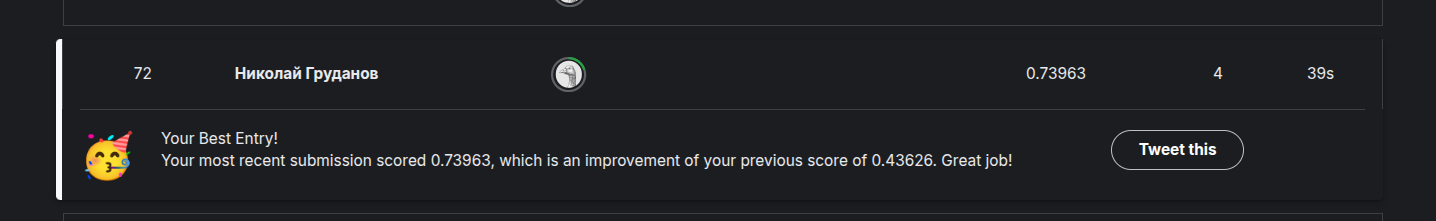

In [4]:
# Импортируем необходимые библиотеки
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import scipy as scipy
from scipy.signal import find_peaks
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Проверка загрузки библиотек и их версий
print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Scikit-learn version:", sk.__version__) 
print("Matplotlib version:", plt.matplotlib.__version__)
print("SciPy version:", scipy.__version__)

NumPy version: 1.26.4
Pandas version: 2.2.3
Scikit-learn version: 1.5.2
Matplotlib version: 3.10.3
SciPy version: 1.13.1


In [6]:
# Читаем данные в датафрейм
df = pd.read_csv('Run200_Wave_0_1.txt', sep=' ', header=None, skipinitialspace=True)


In [7]:
df.shape

(23479, 505)

In [8]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,495,496,497,498,499,500,501,502,503,504
0,2890276,357,113,500,14820,14823,14824,14822,14818,14820,...,14822,14815,14815,14817,14819,14820,14822,14820,14819,NaN
1,4928764,740,359,500,14820,14822,14820,14826,14824,14822,...,14817,14824,14822,14824,14819,14820,14819,14822,14820,NaN
2,9630204,162,499,500,14820,14820,14822,14825,14820,14824,...,14821,14820,14820,14818,14821,14823,14820,14820,14821,NaN
3,15798632,841,123,500,14828,14822,14818,14824,14824,14822,...,14826,14822,14821,14820,14828,14820,14822,14823,14822,NaN
4,20637296,412,348,500,14823,14815,14823,14821,14827,14820,...,14820,14823,14828,14824,14820,14824,14824,14822,14825,NaN


In [9]:
# Убираем столбцы с метаинформацией
signals = df.drop([0, 1, 2, 3, 504], axis=1)
# Нумеруем столбцы
signals.columns = list(range(500))
signals.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,14820,14823,14824,14822,14818,14820,14824,14822,14820,14820,...,14828,14822,14815,14815,14817,14819,14820,14822,14820,14819
1,14820,14822,14820,14826,14824,14822,14820,14822,14823,14821,...,14828,14817,14824,14822,14824,14819,14820,14819,14822,14820
2,14820,14820,14822,14825,14820,14824,14824,14819,14823,14824,...,14820,14821,14820,14820,14818,14821,14823,14820,14820,14821
3,14828,14822,14818,14824,14824,14822,14820,14822,14824,14820,...,14824,14826,14822,14821,14820,14828,14820,14822,14823,14822
4,14823,14815,14823,14821,14827,14820,14823,14824,14816,14821,...,14820,14820,14823,14828,14824,14820,14824,14824,14822,14825


In [10]:
print(f"Загружено {len(signals)} сигналов")

Загружено 23479 сигналов


Наш набор данных (датасет), содержит 500 различных признаков — столбцов. 
Каждый такой признак отображает динамику изменения определённого показателя относительно временного интервала. 


Проверим размер датасета

In [11]:
signals.shape

(23479, 500)

Всего в датасете 23479 сэмплов.
Посмотрим визуально на первые 100

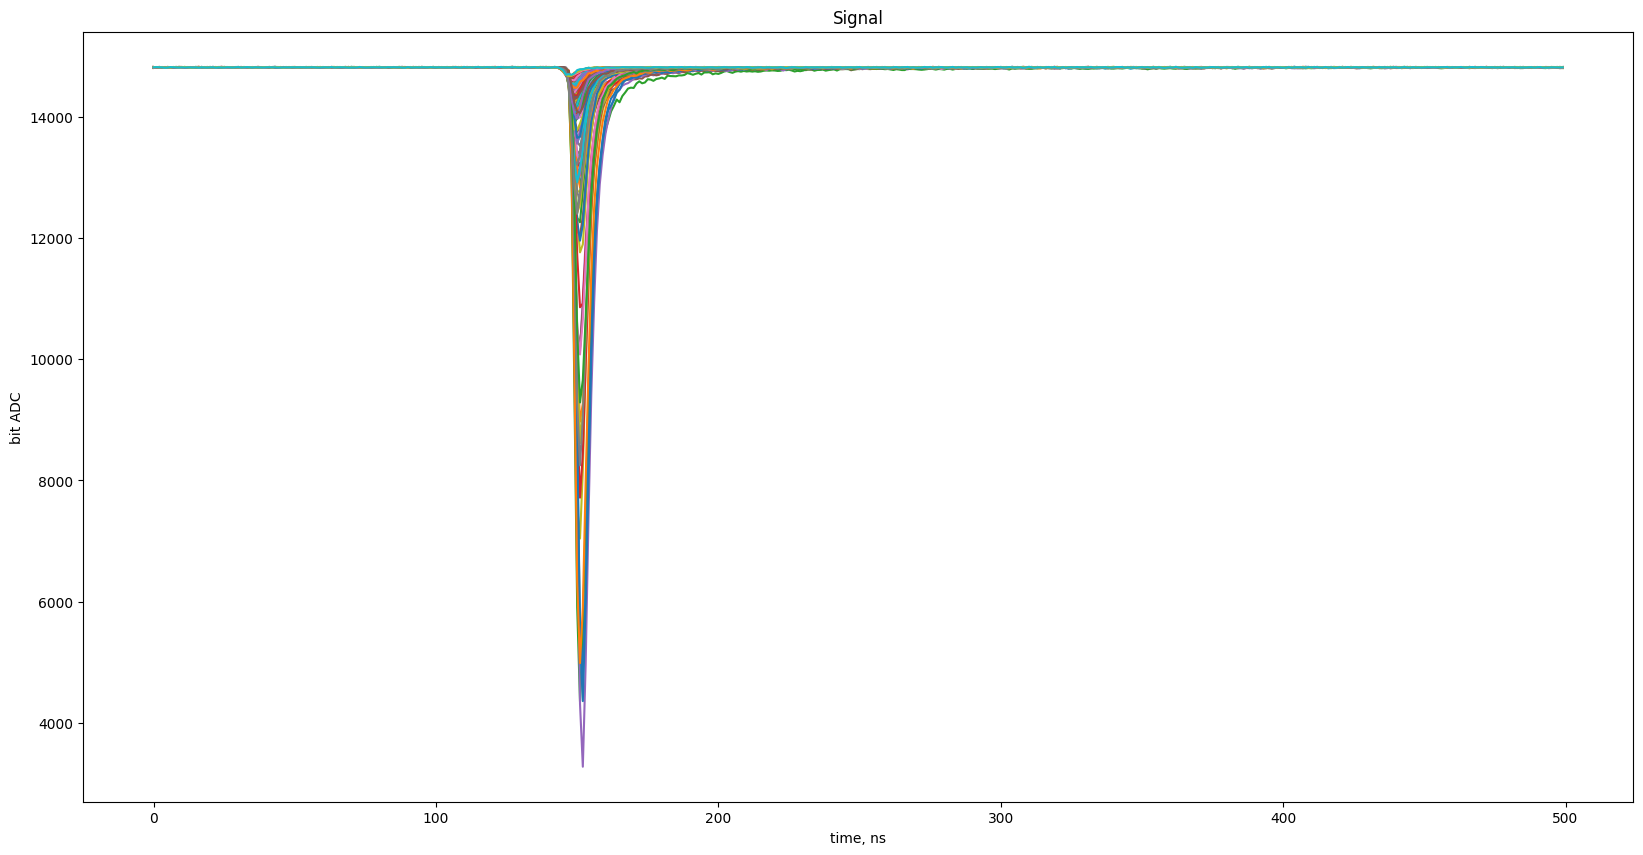

In [12]:
# Определяем диапазон индексов
N = range(0, 100)

# Транспонируем DataFrame и строим график
ax = signals.T[N].plot(title='Signal', legend=None, figsize=(20, 10))

# Настраиваем подписи осей
ax.set_xlabel("time, ns")
ax.set_ylabel("bit ADC")

# Показываем график
plt.show()


Видим, что значимые данные расположены примерно со 140-го по 200-й столбцы.
Резвернем график и отобразим значимую часть

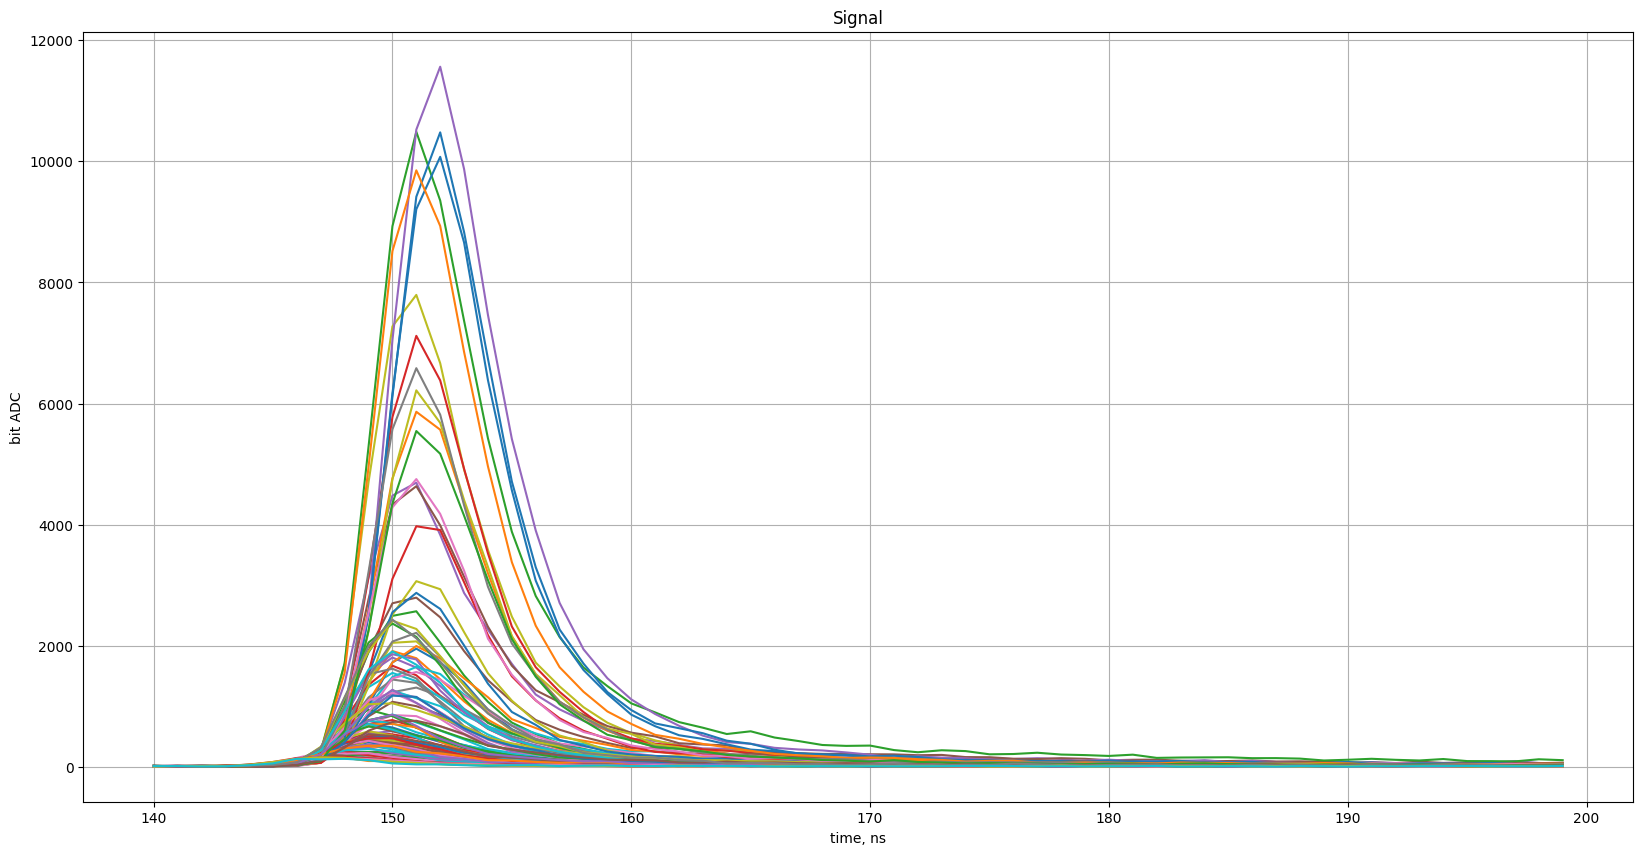

In [13]:
# Обработка данных: инвертируем сигнал, вычитаем 1550 и выбираем срез
processed_signal = (2**14 - signals.T[N] - 1550)[140:200]

# Строим график
ax = processed_signal.plot(title='Signal', legend=None, figsize=(20, 10))

# Настраиваем подписи осей
ax.set_xlabel("time, ns")
ax.set_ylabel("bit ADC")


# Добавляем сетку
ax.grid(True)

# Показываем график
plt.show()


Преобразуем датафрейм для дальнейшей работы с данными в таком виде.

In [14]:
processed_data = 2**14-signals-1550

In [15]:
processed_data.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,14,11,10,12,16,14,10,12,14,14,...,6,12,19,19,17,15,14,12,14,15
1,14,12,14,8,10,12,14,12,11,13,...,6,17,10,12,10,15,14,15,12,14
2,14,14,12,9,14,10,10,15,11,10,...,14,13,14,14,16,13,11,14,14,13
3,6,12,16,10,10,12,14,12,10,14,...,10,8,12,13,14,6,14,12,11,12
4,11,19,11,13,7,14,11,10,18,13,...,14,14,11,6,10,14,10,10,12,9


In [16]:
processed_data.tail()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
23474,8,7,9,16,9,7,7,11,11,11,...,8,6,9,15,8,6,12,10,10,7
23475,10,11,15,6,15,10,10,11,10,13,...,6,8,10,20,20,16,18,12,15,17
23476,12,12,10,14,11,6,11,10,14,10,...,8,17,19,17,16,17,18,15,17,14
23477,10,11,10,12,13,10,14,12,6,7,...,11,10,7,12,9,10,12,14,15,10
23478,14,12,14,14,10,15,10,13,14,9,...,15,9,12,15,16,18,10,14,16,7


Осуществим процедуру добавления нового колонного массива, в ячейки которого будут последовательно записаны максимальные значения соответствующих строковых элементов матрицы.

In [17]:
processed_data = processed_data.copy()
processed_data['max'] = processed_data.max(axis=1)
processed_data['max'].describe()

count    23479.000000
mean      1846.138209
std       2389.308983
min        115.000000
25%        319.000000
50%        824.000000
75%       2326.000000
max      14834.000000
Name: max, dtype: float64

Видим, что максимальное значение 14834.
Найдем такие строки

In [18]:
max_df = processed_data[processed_data['max']==14834]
max_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,max
798,14,14,10,14,17,6,11,11,16,6,...,12,12,14,18,10,14,12,16,12,14834
6401,11,8,10,9,7,11,10,7,7,10,...,14,18,15,14,11,7,11,14,14,14834
9190,12,14,7,15,14,12,14,11,14,11,...,17,14,9,14,15,10,12,12,14,14834
9553,7,14,16,14,11,10,12,11,10,10,...,6,10,15,14,17,14,14,14,11,14834
11289,10,8,11,6,13,19,4,11,12,10,...,14,12,16,12,10,17,17,14,10,14834
13595,9,6,14,7,7,10,12,7,9,10,...,10,13,14,15,11,15,7,14,17,14834
17790,10,10,16,7,7,7,7,9,14,11,...,13,7,8,10,9,14,13,10,10,14834
22310,10,10,7,10,14,11,7,11,10,6,...,17,16,12,11,9,15,4,14,12,14834
23118,7,12,10,12,10,12,14,13,15,11,...,10,10,12,11,12,10,21,18,25,14834


Таких строк всего 9. Визуализируем их значимую часть, сохранив в переменную их индексы

In [19]:
def plot_signal_from_max_df(max_df):
    """
    Строит график сигнала на основе DataFrame, содержащего максимальные значения.

    Параметры:
    ----------
    max_df : pandas.DataFrame
        Входной DataFrame, содержащий данные о сигнале. 
        
    Возвращает:
    ----------
    None
        Функция отображает график с помощью matplotlib, но ничего не возвращает.
    """

    # Получаем список индексов DataFrame
    over_max_index = max_df.index.tolist()

    # Транспонируем DataFrame, выбираем нужные столбцы и срезаем по времени
    ax = max_df.T[over_max_index][140:190].plot(
        title='Signal',
        legend=None,
        figsize=(20, 10)
    )

    # Настраиваем подписи осей
    ax.set_xlabel("time, ns")
    ax.set_ylabel("bit ADC")

    # Добавляем сетку
    ax.grid(True)

    # Отображаем график
    plt.show()


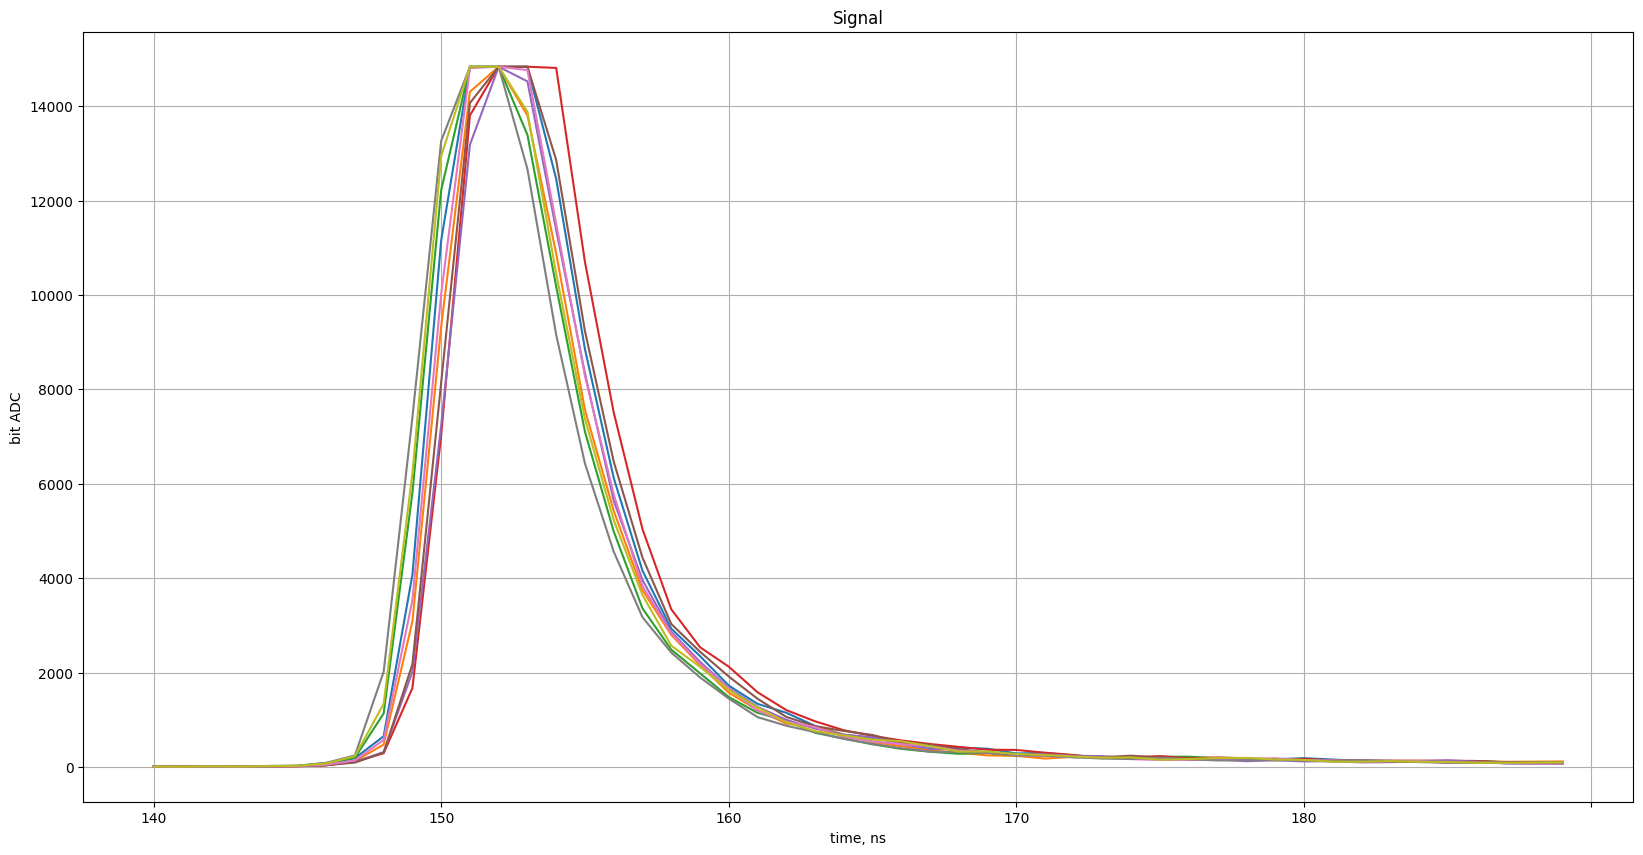

In [20]:
plot_signal_from_max_df(max_df)

Наблюдаем образование горизонтального участка графика при величине параметра, равной 14834 условным единицам, что свидетельствует о достижении порога разрешающей способности используемого измерительного оборудования. 

По завершении процедуры кластерного анализа элементы данной области целесообразно классифицировать как принадлежащие ко второму классу, характеризующему шумы и флуктуации измерений.

In [21]:
processed_data.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,max
0,14,11,10,12,16,14,10,12,14,14,...,12,19,19,17,15,14,12,14,15,543
1,14,12,14,8,10,12,14,12,11,13,...,17,10,12,10,15,14,15,12,14,1913
2,14,14,12,9,14,10,10,15,11,10,...,13,14,14,16,13,11,14,14,13,2570
3,6,12,16,10,10,12,14,12,10,14,...,8,12,13,14,6,14,12,11,12,576
4,11,19,11,13,7,14,11,10,18,13,...,14,11,6,10,14,10,10,12,9,1806


In [22]:
processed_data.tail()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,max
23474,8,7,9,16,9,7,7,11,11,11,...,6,9,15,8,6,12,10,10,7,514
23475,10,11,15,6,15,10,10,11,10,13,...,8,10,20,20,16,18,12,15,17,5777
23476,12,12,10,14,11,6,11,10,14,10,...,17,19,17,16,17,18,15,17,14,5009
23477,10,11,10,12,13,10,14,12,6,7,...,10,7,12,9,10,12,14,15,10,1467
23478,14,12,14,14,10,15,10,13,14,9,...,9,12,15,16,18,10,14,16,7,11013


Найдем среди данных такие, где присутствует несколько пиков.

In [23]:
def count_peaks(row, height=100, distance=100):
    """
    Подсчитывает количество пиков в переданной строке данных.

    Параметры:
    ----------
    row : array-like
        Одномерный массив или pandas.Series, представляющий сигнал,
        в котором необходимо найти пики.

    height : float or int, optional, default=100
        Минимальная высота пики. Пики ниже этого значения игнорируются.

    distance : float or int, optional, default=100
        Минимальное расстояние между пиками. Если расстояние между двумя пиками
        меньше этого значения, второй из них не будет учтён.

    Возвращает:
    ----------
    int
        Количество найденных пиков, удовлетворяющих заданным условиям.

    Примечание:
    ----------
    Используется функция `find_peaks` из библиотеки `scipy.signal`.
    """
    peaks, _ = find_peaks(row, height=height, distance=distance)
    return len(peaks)

In [24]:
# Применяем функцию к каждой строке
peaks_per_row = processed_data.apply(count_peaks, axis=1)

# Строки, где пиков > 1
multi_peak_rows = peaks_per_row[peaks_per_row > 1]
multi_peak_index = multi_peak_rows.index.tolist()
print("Строк с более чем одним пиком:", len(multi_peak_index))

Строк с более чем одним пиком: 2


Таких строки 2. Визуализируем данные

In [25]:
def plot_signal(selected_columns: pd.DataFrame, peak_index: int) -> None:
    """
    Функция для построения графика сигнала.

    Args:
        selected_columns (pd.DataFrame): Данные для построения графика.
        peak_index (int): Индекс для выбора данных из транспонированных данных.
    """
    ax = selected_columns.T[peak_index].plot(title='Signal', legend=None, figsize=(20, 10))
    ax.set_xlabel("time, ns")
    ax.set_ylabel("bit ADC")
    ax.grid(True)

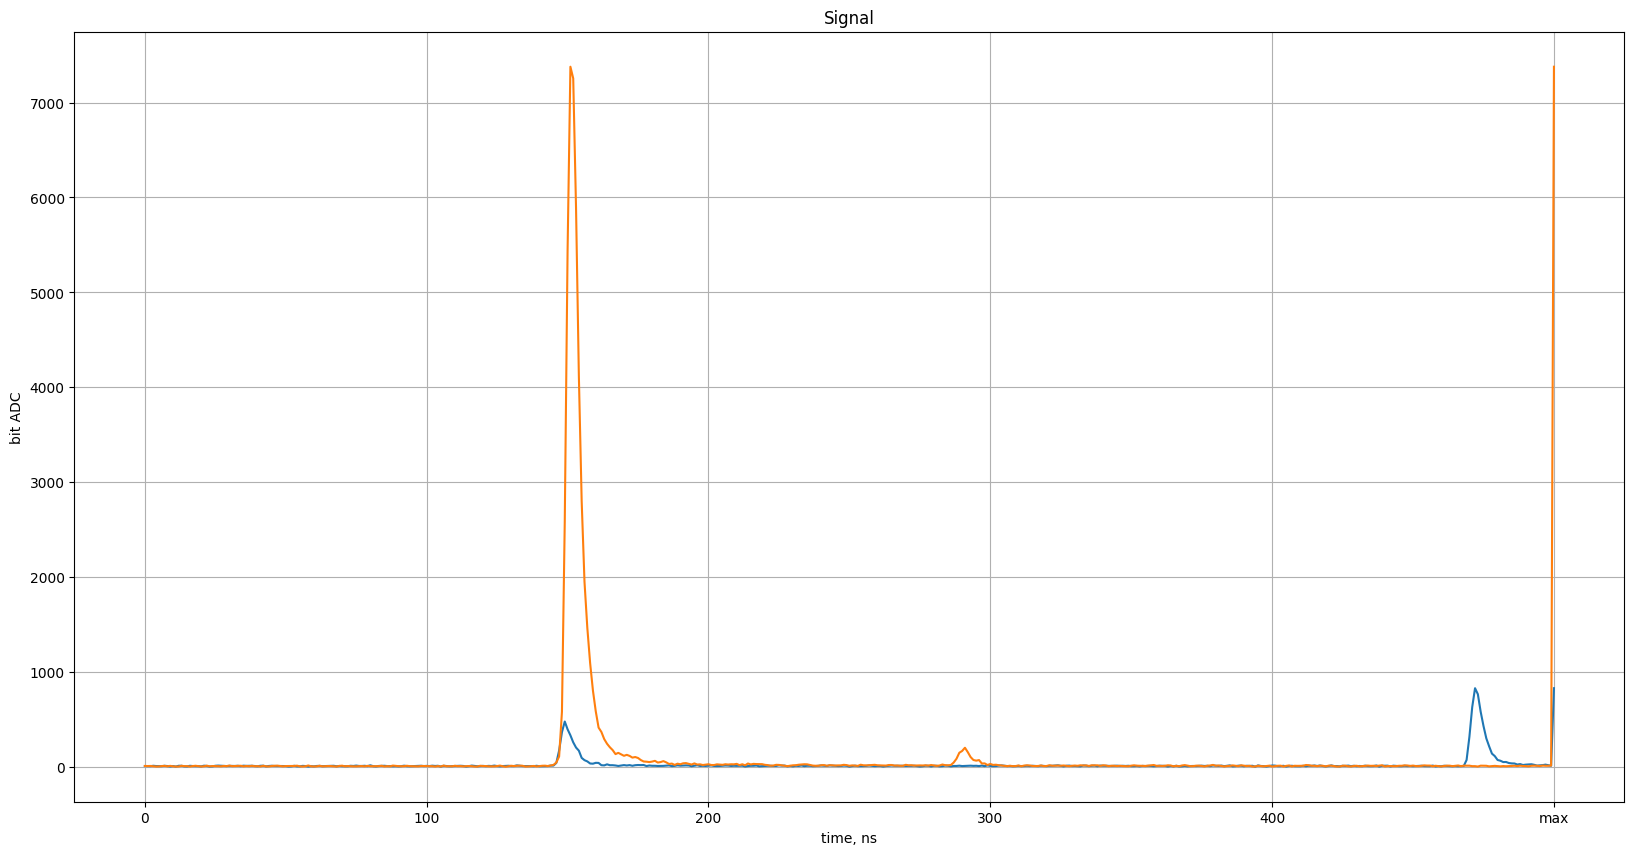

In [26]:
plot_signal(processed_data, multi_peak_index)

Чтобы более точно проанализировать сигнал, необходимо добавить в набор данных новый параметр — амплитуду колебаний в каждом конкретном случае.

In [27]:
processed_data['amplitude'] = processed_data['max'] - processed_data.iloc[:, :-1].min(axis=1)
processed_data['amplitude'].describe()

count    23479.000000
mean      1842.849568
std       2389.075855
min        113.000000
25%        316.000000
50%        820.000000
75%       2322.500000
max      14833.000000
Name: amplitude, dtype: float64

In [28]:
processed_data.head()

,0,1,2,3,4,5,6,7,8,9,...,492,493,494,495,496,497,498,499,max,amplitude
0,14,11,10,12,16,14,10,12,14,14,...,19,19,17,15,14,12,14,15,543,539
1,14,12,14,8,10,12,14,12,11,13,...,10,12,10,15,14,15,12,14,1913,1907
2,14,14,12,9,14,10,10,15,11,10,...,14,14,16,13,11,14,14,13,2570,2566
3,6,12,16,10,10,12,14,12,10,14,...,12,13,14,6,14,12,11,12,576,573
4,11,19,11,13,7,14,11,10,18,13,...,11,6,10,14,10,10,12,9,1806,1800


Также мы можем вычислить площадь под графиком для каждой строки матрицы. Эта величина будет количественно описывать, как быстро затухает изучаемый процесс.


Поскольку расстояние между соседними элементами в строках одинаково, мы можем принять его за условную единицу измерения. Тогда площадь под графиком для каждой строки можно посчитать, просто сложив значения элементов этой строки.

In [29]:
processed_data['square'] = processed_data.iloc[:, :-2].sum(axis=1)
processed_data.head()

,0,1,2,3,4,5,6,7,8,9,...,493,494,495,496,497,498,499,max,amplitude,square
0,14,11,10,12,16,14,10,12,14,14,...,19,17,15,14,12,14,15,543,539,11049
1,14,12,14,8,10,12,14,12,11,13,...,12,10,15,14,15,12,14,1913,1907,18113
2,14,14,12,9,14,10,10,15,11,10,...,14,16,13,11,14,14,13,2570,2566,22995
3,6,12,16,10,10,12,14,12,10,14,...,13,14,6,14,12,11,12,576,573,10278
4,11,19,11,13,7,14,11,10,18,13,...,6,10,14,10,10,12,9,1806,1800,17891


Визуализируем данные по амплитуде и площади под кривой

In [30]:
def plot_scatter(data: pd.DataFrame, x_col: str, y_col: str, title: str) -> None:
    """
    Строит диаграмму рассеяния для двух столбцов данных.

    :param data: DataFrame с данными.
    :param x_col: Название столбца для оси X.
    :param y_col: Название столбца для оси Y.
    :param title: Заголовок графика.
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(data[x_col], data[y_col], alpha=0.7)
    plt.xlabel(x_col.capitalize())
    plt.ylabel(y_col.capitalize())
    plt.title(title)
    plt.grid(True)
    plt.show()

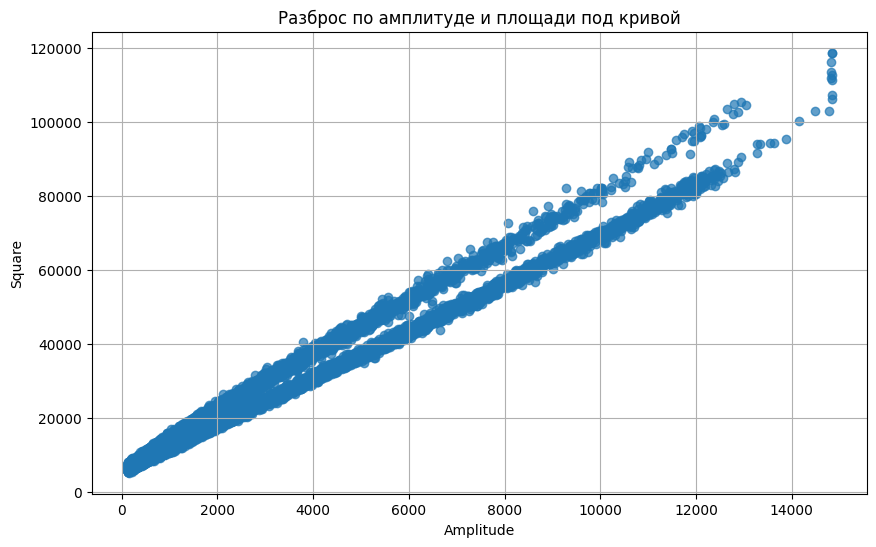

In [31]:
plot_scatter(processed_data, 'amplitude', 'square', 'Разброс по амплитуде и площади под кривой')

На графике с определенного момента видно четкое разделение на два класса.
Опираясь на эти показатели, разобъем данные на кластеры. Подготовим датафрейм

In [32]:
X = processed_data[['amplitude', 'square']]
X.head()

,amplitude,square
0,539,11049
1,1907,18113
2,2566,22995
3,573,10278
4,1800,17891


Для успешного применения метода главных компонент (PCA) важно предварительно стандартизировать данные.

In [33]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Выделим главные компоненты методом PCA

In [34]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Объясненная дисперсия:", pca.explained_variance_ratio_)

Объясненная дисперсия: [0.99503368 0.00496632]


Визуализируем значение компонент

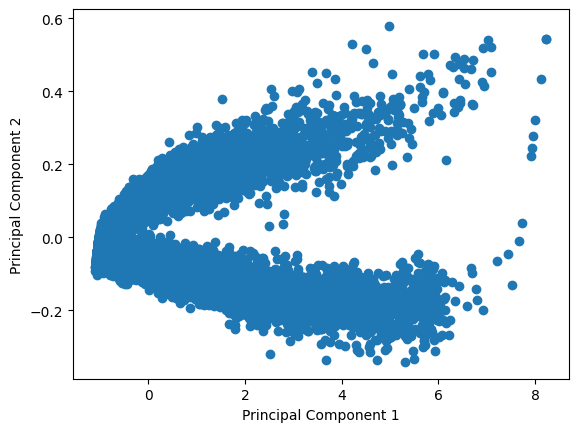

In [35]:
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Разделение на кластеры визуально стало четче.
Попробуем применить KMeans для разбиения на кластеры

In [36]:
kmeans = KMeans(n_clusters=2, n_init=100, random_state=42)
clusters = kmeans.fit_predict(X_pca)

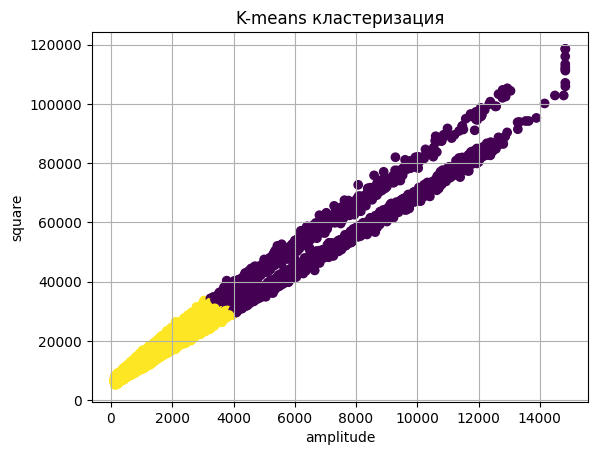

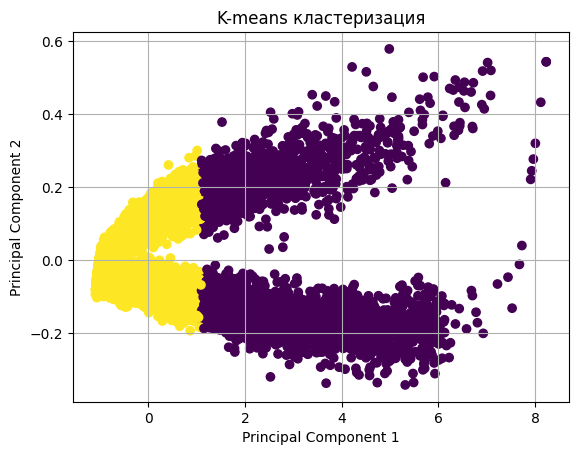

In [37]:
# Визуализация
plt.scatter(processed_data['amplitude'], processed_data['square'], c=clusters)
plt.xlabel('amplitude')
plt.ylabel('square')
plt.title('K-means кластеризация')
plt.grid(True)
plt.show()

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means кластеризация')
plt.grid(True)
plt.show()

KMean не справляется с таким разделением.
Попробуем агломеративную кластеризацию

In [38]:
agg = AgglomerativeClustering(n_clusters=2).fit(X_pca)
clusters = agg.labels_

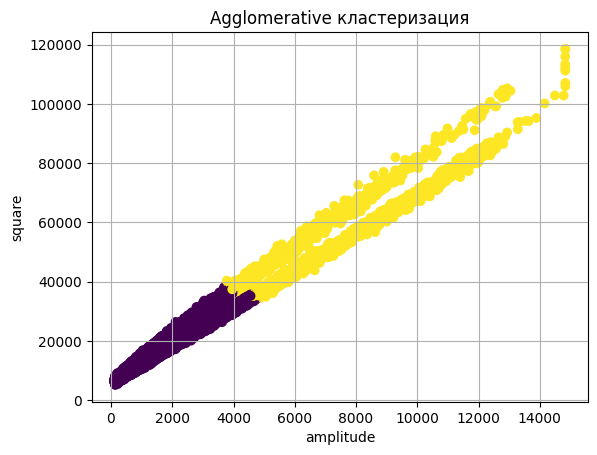

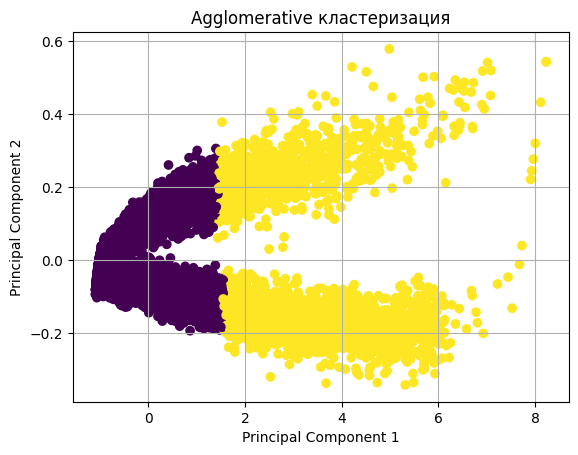

In [39]:
plt.scatter(processed_data['amplitude'], processed_data['square'], c=clusters)
plt.xlabel('amplitude')
plt.ylabel('square')
plt.title('Agglomerative кластеризация')
plt.grid(True)
plt.show()

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Agglomerative кластеризация')
plt.grid(True)
plt.show()

Эта модель показала плохие результаты. 

Стоит провести ещё одно исследование, чтобы понять, насколько хорошо работает алгоритм кластеризации DBSCAN. Для этого нужно изменить настройки алгоритма.

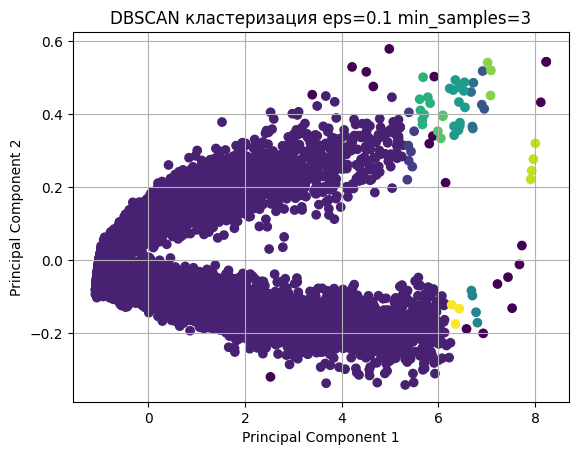

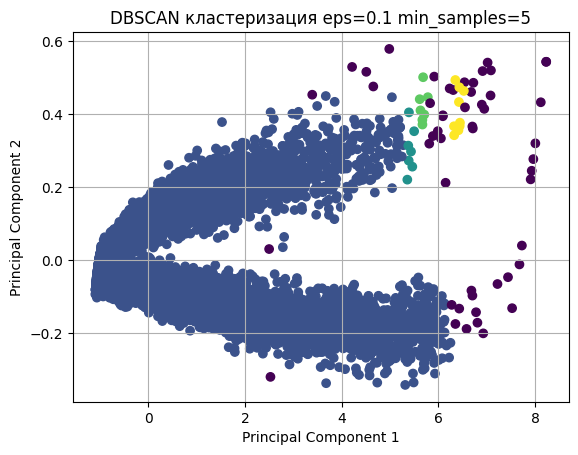

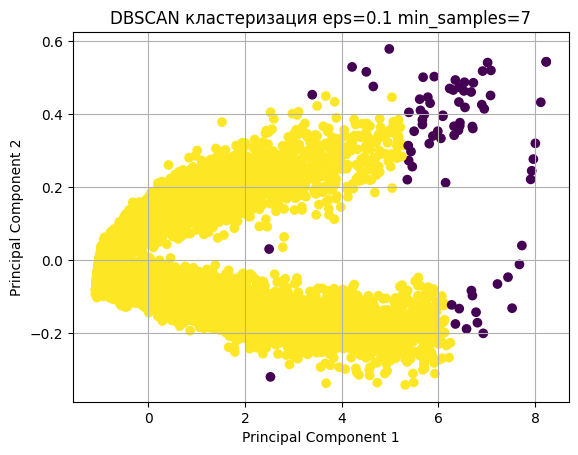

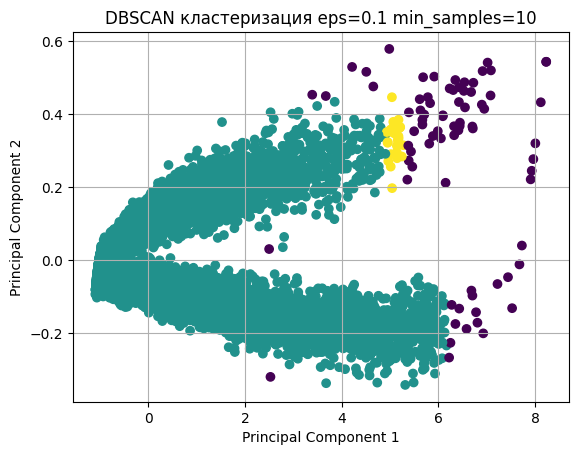

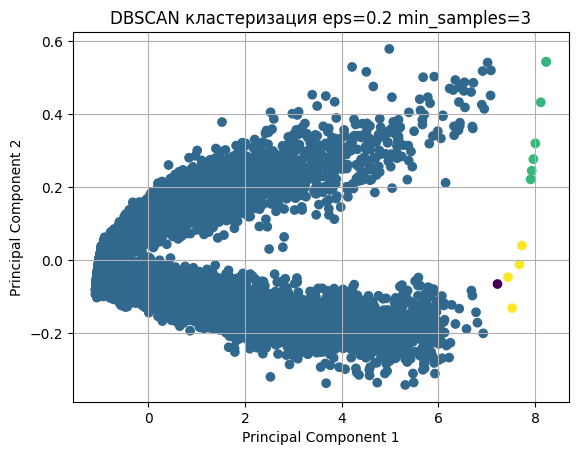

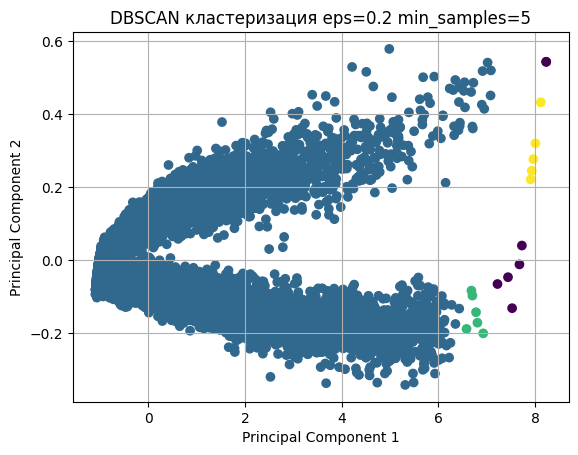

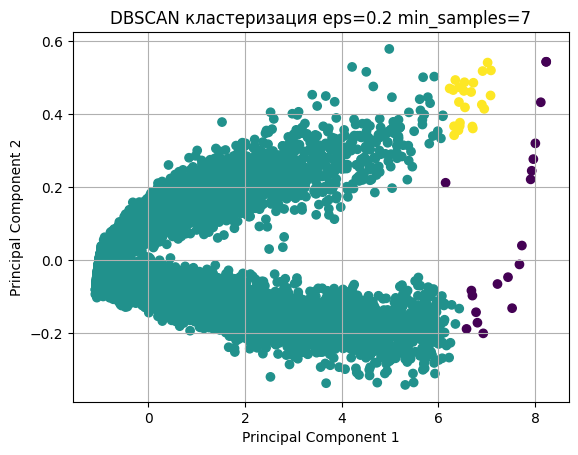

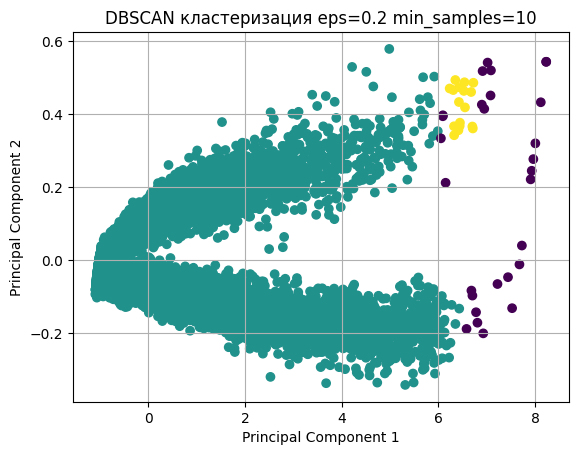

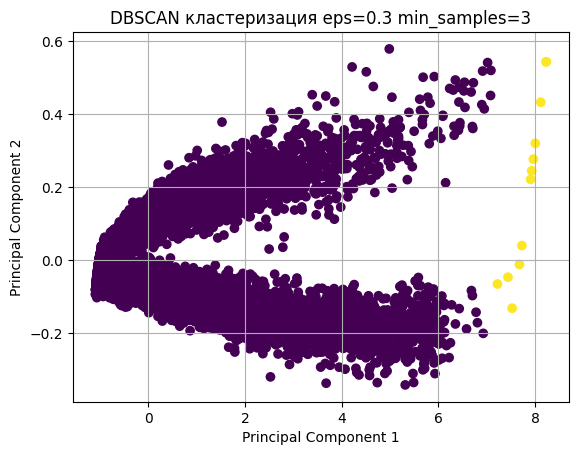

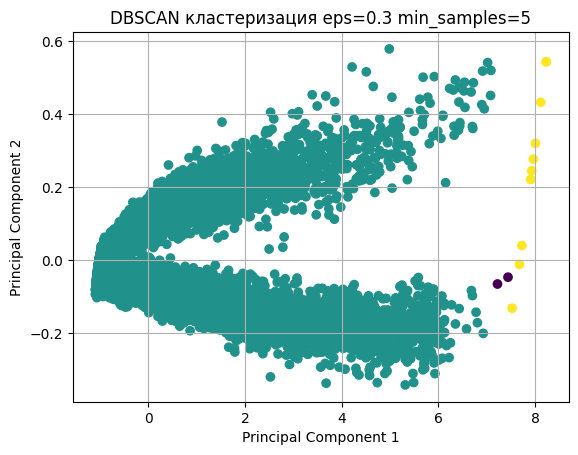

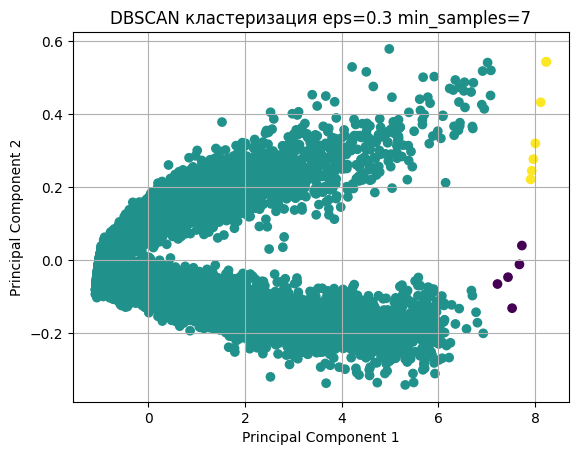

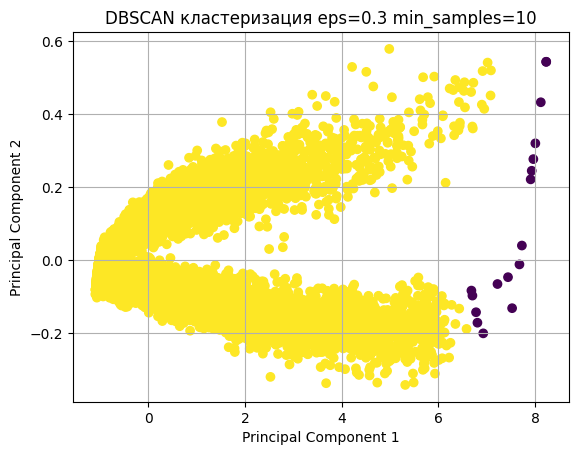

In [40]:
for i in [0.1, 0.2, 0.3]:
    for y in [3, 5, 7, 10]:
        dbscan = DBSCAN(eps=i, min_samples=y).fit(X_pca)
        clusters = dbscan.labels_
        # Визуализация
        plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters)
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.title(f'DBSCAN кластеризация eps={i} min_samples={y}')
        plt.grid(True)
        plt.show()

Алгоритм DBSCAN продемонстрировал свою неэффективность применительно к заданной структуре данных.

 В этой связи представляется целесообразным проведение экспериментов с использованием метода Gaussian Mixture Model (GMM), характеризующегося способностью адаптироваться к разнообразию форм кластеров посредством задания гауссовых распределений смешанного типа.

In [41]:
gmm = GaussianMixture(n_components=2, init_params='k-means++', n_init=200).fit(X_pca)
clusters = gmm.predict(X_pca)

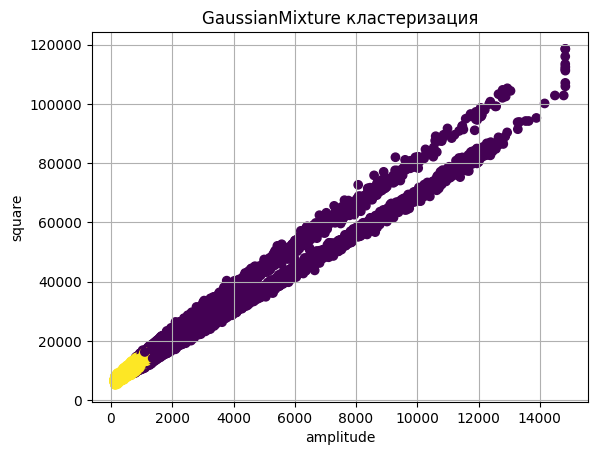

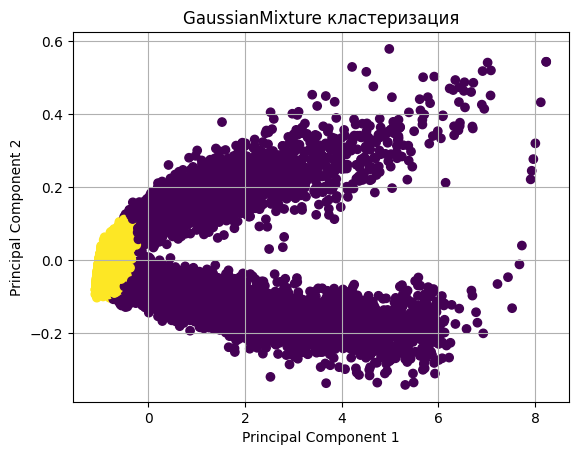

In [42]:
plt.scatter(processed_data['amplitude'], processed_data['square'], c=clusters)
plt.xlabel('amplitude')
plt.ylabel('square')
plt.title('GaussianMixture кластеризация')
plt.grid(True)
plt.show()

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('GaussianMixture кластеризация')
plt.grid(True)
plt.show()

Помимо приведенных, я попробовал разные сочетания гиперпараметров во всех моделях, но так и не смог добиться правильного разделения моделями.
На графике PCA видно, что довольно точно можно разделить на два кластера просто проведя прямую по оси ординат в значении немного меньше 0.
Методом проб и ошибок наилучший результат удалось получить при пороговом значении второй главной компоненты в -0,015

In [43]:
# Создаём массив из единиц той же длины, что и исходный массив
clusters = np.ones(len(X_pca), dtype=int)  # [1, 1, 1, 1, 1]

# Заменяем 1 на 0 там, где второй компонент > -0.015
clusters[X_pca[:, 1] > -0.015] = 0

# проставляем класс шумов для данных, выходящих за границы чувствительности прибора
over_max_index = max_df.index.tolist()
np.put(clusters, over_max_index, 2)
# и для строк с двумя пиками
np.put(clusters, multi_peak_index, 2)

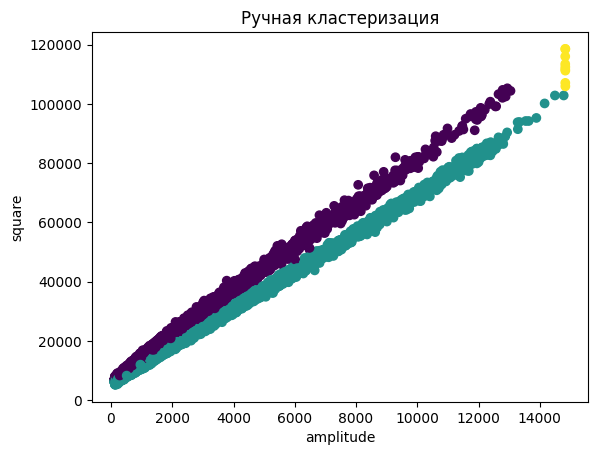

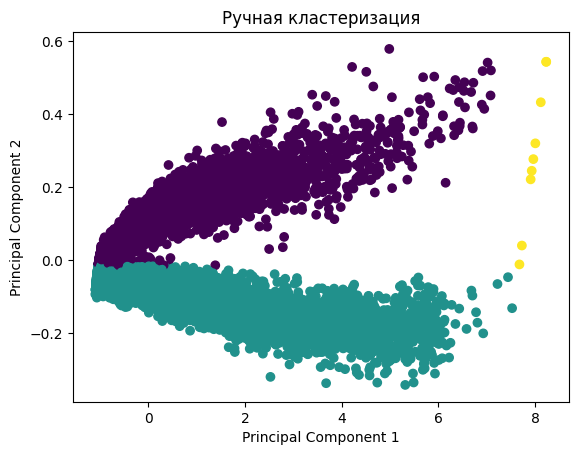

In [44]:
plt.scatter(processed_data['amplitude'], processed_data['square'], c=clusters)
plt.xlabel('amplitude')
plt.ylabel('square')
plt.title('Ручная кластеризация')
plt.show()

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Ручная кластеризация')
plt.show()

In [45]:
inverted = np.where((clusters == 0) | (clusters == 1), 1 - clusters, clusters)

# Преобразуем в DataFrame
df = pd.DataFrame({
    'index': np.arange(len(inverted)),  # Столбец индексов
    'cluster': inverted                 # Столбец значений
})

# Сохраняем в CSV
df.to_csv('submission.csv', index=False)

Попробуем ансамль методов для синергии подходов. Теоретически может улучшить решение

In [ ]:
def solve_clustering_task(data_file="Run200_Wave_0_1.txt"):
    """
    Решает задачу кластеризации сигналов из заданного файла на три кластера.

    Параметры:
    ----------
    data_file : str, optional (default='Run200_Wave_0_1.txt')
        Путь к файлу с данными. Предполагается, что файл содержит числовые данные,
        разделенные пробелами, без заголовков.

    Возвращает:
    ----------
    numpy.ndarray
        Массив финальных меток кластеров для каждого сигнала.

    Описание работы:
    ----------------
    1. **Загрузка данных**:
       - Сигналы извлекаются из столбцов 4–503 (индекс 4 до 504 в Python).
       - Предполагается, что файл содержит не менее 504 столбцов.

    2. **Извлечение признаков**:
       - Для каждого сигнала вычисляются статистические, временные и спектральные признаки.
       - Каждый сигнал нормализуется относительно его начального значения.
       - Обработка включает: амплитуду, среднее, дисперсию, моменты распределения, FWHM, энергию, площадь, PSD, время затухания, доминирующую частоту.

    3. **Нормализация**:
       - Признаки масштабируются с помощью `StandardScaler`.

    4. **Кластеризация**:
       - Используются три алгоритма: DBSCAN, GMM и K-Means.
       - DBSCAN используется для выделения выбросов.
       - GMM и K-Means предполагают 3 кластера.
       - Финальные метки строятся как консенсус между GMM и K-Means, с учетом шумовых меток от DBSCAN.

    5. **Оценка качества**:
       - Для каждого метода выводятся коэффициенты силуэта и индекс Calinski-Harabasz.
       - Выводится финальное количество объектов в каждом кластере.

    Примечание:
    ----------
    - Код предполагает, что входной файл существует и имеет правильную структуру.
    - Все необходимые библиотеки должны быть импортированы заранее.
    - Для корректной работы требуется установить scikit-learn, scipy, numpy, pandas.
    """

    # 1. Загрузка данных
    print("Загрузка данных...")
    df = pd.read_csv(data_file, sep=" ", header=None, skipinitialspace=True)
    signals = df.iloc[:, 4:504].values
    print(f"Загружено {len(signals)} сигналов")

    # 2. Расширенное извлечение признаков
    print("Извлечение признаков...")
    features = []

    for signal in signals:

        # Базовые статистики
        max_val = np.max(signal)
        amplitude = max_val - np.min(signal)
        mean_val = np.mean(signal)
        std_val = np.std(signal)

        # Моменты распределения
        skew = stats.skew(signal)
        kurt = stats.kurtosis(signal)

        # Признаки формы сигнала
        max_idx = np.argmax(signal)
        rise_time = max_idx

        # Ширина на полувысоте (FWHM)
        half_max = max_val / 2
        above_half = signal >= half_max
        fwhm = np.sum(above_half)

        # Энергетические характеристики
        energy = np.sum(signal**2)
        area = scipy.integrate.trapezoid(signal)

        # Улучшенный PSD
        total_integral = np.sum(signal[max_idx:])
        short_integral = np.sum(signal[max_idx : max_idx + 50])
        psd = (
            (total_integral - short_integral) / total_integral
            if total_integral > 0
            else 0
        )

        # Время затухания (экспоненциальная аппроксимация)
        try:
            decay_part = signal[max_idx:]
            log_decay = np.log(decay_part[decay_part > max_val * 0.1])
            if len(log_decay) > 10:
                decay_time = -1 / np.polyfit(range(len(log_decay)), log_decay, 1)[0]
            else:
                decay_time = len(decay_part)
        except (ValueError, TypeError, IndexError) as e:
            print(f"Ошибка при расчете времени затухания: {e}")
            decay_time = len(signal) - max_idx

        # Спектральные признаки
        fft_vals = np.abs(np.fft.fft(signal))
        dom_freq = np.argmax(fft_vals[: len(signal) // 2])

        feature_vector = [
            amplitude,
            mean_val,
            std_val,
            skew,
            kurt,
            rise_time,
            fwhm,
            energy,
            area,
            psd,
            decay_time,
            dom_freq,
        ]
        features.append(feature_vector)

    features = np.array(features)
    print(f"Извлечено {features.shape[1]} признаков")

    # 3. Нормализация признаков
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    # 4. Кластеризация тремя методами
    print("Кластеризация...")

    # DBSCAN - автоматически выделяет выбросы
    dbscan = DBSCAN(eps=0.5, min_samples=10)
    labels_dbscan = dbscan.fit_predict(features_scaled)

    # Gaussian Mixture Model для 3 кластеров
    gmm = GaussianMixture(n_components=3, random_state=42)
    labels_gmm = gmm.fit_predict(features_scaled)

    # K-Means для 3 кластеров
    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
    labels_kmeans = kmeans.fit_predict(features_scaled)

    # 5. Ensemble clustering (консенсус методов)
    final_labels = []
    for i in range(len(features)):
        # Если DBSCAN считает точку шумом - относим к кластеру 2
        if labels_dbscan[i] == -1:
            final_labels.append(2)
        else:
            # Консенсус между GMM и K-Means
            votes = [labels_gmm[i], labels_kmeans[i]]
            final_labels.append(max(set(votes), key=votes.count))

    final_labels = np.array(final_labels)

    # 6. Оценка качества
    print("\nРезультаты кластеризации:")
    methods = {
        "DBSCAN": labels_dbscan,
        "GMM": labels_gmm,
        "K-Means": labels_kmeans,
        "Ensemble": final_labels,
    }

    for name, labels in methods.items():
        unique_labels = np.unique(labels)
        if len(unique_labels) > 1:
            sil = silhouette_score(features_scaled, labels)
            ch = calinski_harabasz_score(features_scaled, labels)
            print(f"{name:12s}: Силуэт={sil:.4f}, CH={ch:.4f}")

    # Финальное распределение по кластерам
    print("\nФинальное распределение:")
    unique, counts = np.unique(final_labels, return_counts=True)
    cluster_names = {0: "Гамма-кванты", 1: "Нейтроны", 2: "Шум/Выбросы"}
    for label, count in zip(unique, counts):
        print(f"Кластер {label} ({cluster_names.get(label)}): {count} сигналов")

    return final_labels, features


# Запуск решения
final_clustering, features = solve_clustering_task()


Загрузка данных...
Загружено 23479 сигналов
Извлечение признаков...
Извлечено 12 признаков
Кластеризация...

Результаты кластеризации:
DBSCAN      : Силуэт=0.4191, CH=739.3863
GMM         : Силуэт=0.1663, CH=6943.4295
K-Means     : Силуэт=0.3678, CH=11459.7427
Ensemble    : Силуэт=0.3569, CH=9729.1415

Финальное распределение:
Кластер 0 (Гамма-кванты): 17367 сигналов
Кластер 1 (Нейтроны): 4918 сигналов
Кластер 2 (Шум/Выбросы): 1194 сигналов


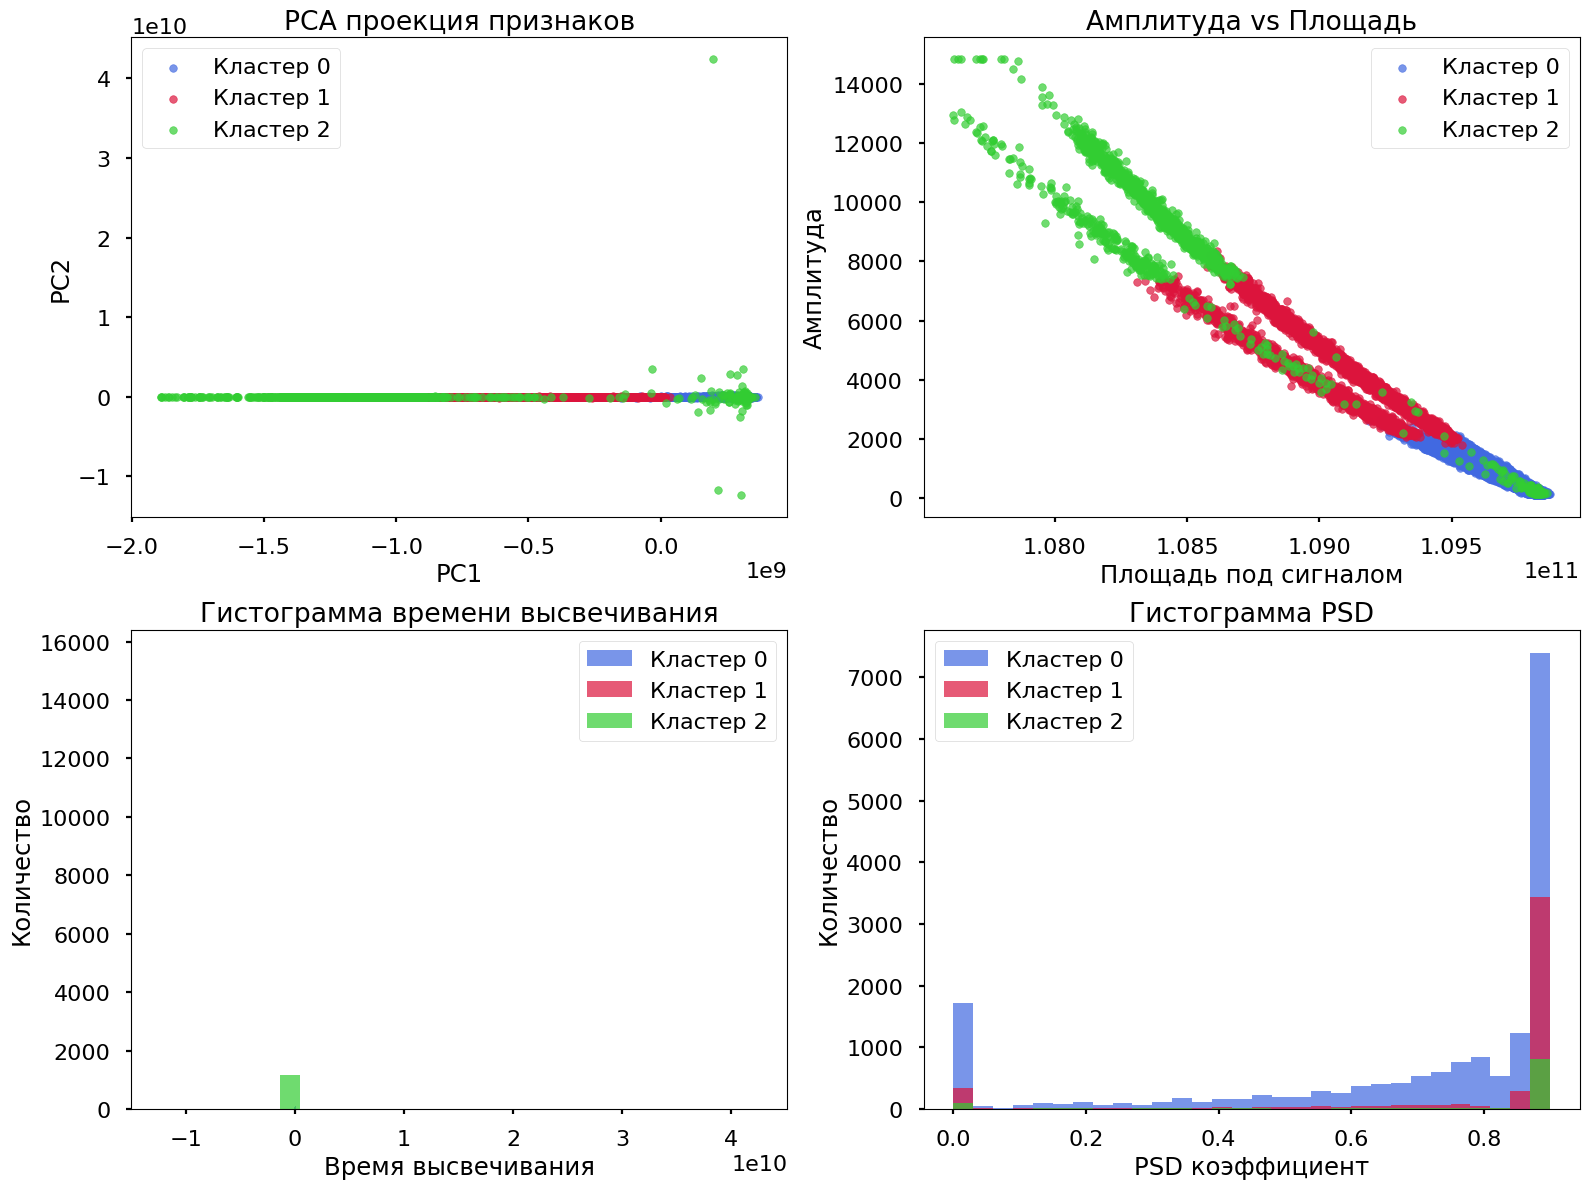

In [49]:

# Преобразование номеров кластеров по частоте (0 — самый большой кластер)
def relabel_clusters(labels):
    unique, counts = np.unique(labels, return_counts=True)
    order = np.argsort(-counts)  # по убыванию размера
    mapping = {unique[i]: i for i in order}
    return np.array([mapping[x] for x in labels])

labels_ordered = relabel_clusters(final_clustering)

# Сохранение результата в формате submission
submission = pd.DataFrame({'index': np.arange(len(labels_ordered)), 'cluster': labels_ordered})
submission.to_csv('clustering_results.csv', index=False)

# Визуализация кластеров

plt.style.use('seaborn-v0_8-poster')
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
colors = ['royalblue', 'crimson', 'limegreen']
labels_unique = np.unique(labels_ordered)

# PCA scatter plot
pca = PCA(n_components=2)
X_pca = pca.fit_transform(features)
for cl in labels_unique:
    axs[0, 0].scatter(
        X_pca[labels_ordered == cl, 0],
        X_pca[labels_ordered == cl, 1],
        alpha=0.7,
        label=f'Кластер {cl}',
        color=colors[cl % len(colors)],
        s=30
    )
axs[0, 0].set_title('PCA проекция признаков')
axs[0, 0].set_xlabel('PC1')
axs[0, 0].set_ylabel('PC2')
axs[0, 0].legend()

# Амплитуда vs Площадь (предполагается, что признаки 0 — амплитуда, 7 — площадь)
for cl in labels_unique:
    axs[0, 1].scatter(
        features[labels_ordered == cl, 7],  # площадь
        features[labels_ordered == cl, 0],  # амплитуда
        alpha=0.7,
        label=f'Кластер {cl}',
        color=colors[cl % len(colors)],
        s=30
    )
axs[0, 1].set_title('Амплитуда vs Площадь')
axs[0, 1].set_xlabel('Площадь под сигналом')
axs[0, 1].set_ylabel('Амплитуда')
axs[0, 1].legend()

# Гистограмма времени высвечивания (признак 10)
for cl in labels_unique:
    axs[1, 0].hist(
        features[labels_ordered == cl, 10],
        bins=30,
        alpha=0.7,
        label=f'Кластер {cl}',
        color=colors[cl % len(colors)]
    )
axs[1, 0].set_title('Гистограмма времени высвечивания')
axs[1, 0].set_xlabel('Время высвечивания')
axs[1, 0].set_ylabel('Количество')
axs[1, 0].legend()

# Гистограмма PSD (признак 9)
for cl in labels_unique:
    axs[1, 1].hist(
        features[labels_ordered == cl, 9],
        bins=30,
        alpha=0.7,
        label=f'Кластер {cl}',
        color=colors[cl % len(colors)]
    )
axs[1, 1].set_title('Гистограмма PSD')
axs[1, 1].set_xlabel('PSD коэффициент')
axs[1, 1].set_ylabel('Количество')
axs[1, 1].legend()

plt.tight_layout()
plt.savefig('clustering_results_visualization.png', dpi=200)
plt.show()



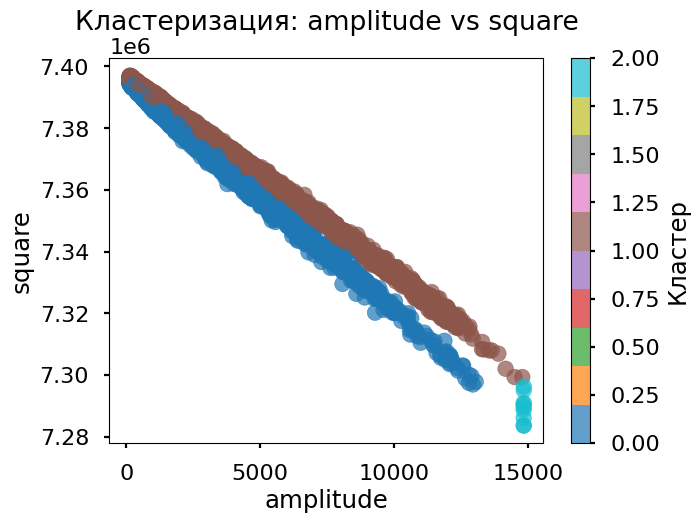

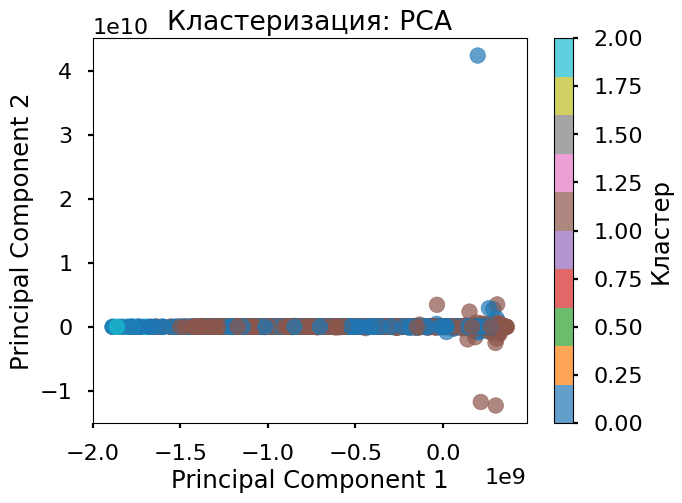

In [50]:

feature_names = ['amplitude', 'mean', 'std', 'skew', 'kurt', 'rise_time', 'fwhm', 'energy', 'square', 'psd', 'decay_time', 'dom_freq']
dataset = pd.DataFrame(features, columns=feature_names)

# clusters — ваши метки кластеров
plt.figure(figsize=(7, 5))
plt.scatter(dataset['amplitude'], dataset['square'], c=clusters, cmap='tab10', alpha=0.7)
plt.xlabel('amplitude')
plt.ylabel('square')
plt.title('Кластеризация: amplitude vs square')
plt.colorbar(label='Кластер')
plt.show()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(features)
plt.figure(figsize=(7, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='tab10', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Кластеризация: PCA')
plt.colorbar(label='Кластер')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from scipy.signal import find_peaks
from scipy import stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Feature engineering functions
def calculate_features(signal):
    # Basic statistics
    max_val = np.max(signal)
    min_val = np.min(signal)
    mean_val = np.mean(signal)
    std_val = np.std(signal)
    
    # Amplitude and range
    amplitude = max_val - min_val
    
    # Statistical moments
    skew = stats.skew(signal)
    kurt = stats.kurtosis(signal)
    
    # Time-domain features
    max_idx = np.argmax(signal)
    rise_time = max_idx
    
    # Width at half maximum
    half_max = max_val / 2
    above_half = signal >= half_max
    fwhm = np.sum(above_half)
    
    # Energy and area
    energy = np.sum(signal**2)
    area = np.sum(signal)  # Simplified area calculation
    
    # Peak features
    peaks, _ = find_peaks(signal, height=0.1*amplitude, distance=50)
    n_peaks = len(peaks)
    
    # Frequency domain features (simplified)
    fft_vals = np.abs(np.fft.fft(signal))
    dom_freq = np.argmax(fft_vals[:len(signal)//2])
    
    return {
        'max': max_val,
        'min': min_val,
        'mean': mean_val,
        'std': std_val,
        'amplitude': amplitude,
        'skew': skew,
        'kurt': kurt,
        'rise_time': rise_time,
        'fwhm': fwhm,
        'energy': energy,
        'area': area,
        'n_peaks': n_peaks,
        'dom_freq': dom_freq
    }

# Load and preprocess data
def load_and_preprocess_data():
    # Read data
    df = pd.read_csv('Run200_Wave_0_1.txt', sep=' ', header=None, skipinitialspace=True)
    signals = df.drop([0, 1, 2, 3, 504], axis=1)
    signals.columns = list(range(500))
    
    # Process data
    processed_data = 2**14 - signals - 1550
    
    # Calculate features
    features = []
    for i, signal in processed_data.iterrows():
        if i % 1000 == 0:
            print(f'Processing signal {i}/{len(processed_data)}')
        signal_features = calculate_features(signal.values)
        features.append(signal_features)
    
    features_df = pd.DataFrame(features)
    
    # Identify special cases
    max_signals = processed_data.max(axis=1) == 14834
    
    return processed_data, features_df, max_signals

# Main function
def main():
    # Load and preprocess data
    processed_data, features_df, max_signals = load_and_preprocess_data()
    
    # Standardize data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(features_df)
    
    # Apply PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    
    # Use the best DBSCAN parameters from our analysis
    eps = 0.4
    min_samples = 5  # This is an integer
    
    # Create and fit the model
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(X_pca)
    
    # Handle special cases
    # Mark saturated signals as noise (cluster -1)
    clusters[max_signals.values] = -1
    
    # Create submission format
    submission = pd.DataFrame({
        'index': np.arange(len(clusters)),
        'cluster': clusters
    })
    
    # Save submission
    submission.to_csv('final_submission.csv', index=False)
    
    # Visualize the clustering
    plt.figure(figsize=(10, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=5)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'Final Clustering: DBSCAN (eps={eps}, min_samples={min_samples})')
    plt.colorbar(label='Cluster')
    plt.grid(True)
    plt.savefig('final_clustering.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    # Print summary
    unique, counts = np.unique(clusters, return_counts=True)
    print('\nClustering complete. Results:')
    for label, count in zip(unique, counts):
        print(f'Cluster {label}: {count} signals')
    
    print('\nSubmission saved to final_submission.csv')
    print('Visualization saved to final_clustering.png')

if __name__ == "__main__":
    main()

Evaluating clustering with amplitude and area features...
Evaluating clustering with all features...

Best results with amplitude and area features:
    method  n_clusters  silhouette  calinski_harabasz  davies_bouldin  eps  \
15  DBSCAN         2.0    0.795128         347.770628        0.165980  0.4   
16  DBSCAN         2.0    0.795128         347.770628        0.165980  0.4   
13  DBSCAN         2.0    0.793548         374.455032        0.173099  0.3   

    min_samples  noise_ratio  n_components  
15          5.0          0.0           NaN  
16          7.0          0.0           NaN  
13          5.0          0.0           NaN  

Best results with all features:
    method  n_clusters  silhouette  calinski_harabasz  davies_bouldin  eps  \
16  DBSCAN         4.0    0.685144         173.826494        1.894288  0.4   
17  DBSCAN         2.0    0.683107         544.857677        0.833908  0.4   
15  DBSCAN         5.0    0.677621         121.814904        1.722344  0.4   

    min_samp

InvalidParameterError: The 'min_samples' parameter of DBSCAN must be an int in the range [1, inf). Got 5.0 instead.